In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jagdishchakole1/mango-data")

print("Path to dataset files:", path)

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 104M/104M [00:08<00:00, 13.1MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jagdishchakole1/mango-data/versions/1


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.cache/kagglehub/datasets/jagdishchakole1/mango-data/versions/1/Mango_leaf_disease1'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))
print("hello")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

hello


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2025-03-09 18:35:15.292035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741525515.303434   32935 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741525515.306794   32935 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 18:35:15.318042: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Load the VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

I0000 00:00:1741525516.722102   32935 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5558 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


In [5]:
# Freeze all convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Flatten the output of the convolutional base
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
x = Dense(8, activation='softmax')(x)  # 8-class classification

# Create the new model
model = Model(inputs=base_model.input, outputs=x)


In [7]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)

In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,139,528 (80.64 MB)

 Trainable params: 6,424,840 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator (for rescaling)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    '.cache/kagglehub/datasets/jagdishchakole1/mango-data/versions/1/Mango_leaf_disease1/train',   # Path to train folder
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical'  # Multi-class classification (8 classes)
)

# Load Validation Data
val_generator = val_datagen.flow_from_directory(
    '.cache/kagglehub/datasets/jagdishchakole1/mango-data/versions/1/Mango_leaf_disease1/val',   # Path to validation folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Test Data (For final evaluation)
test_generator = test_datagen.flow_from_directory(
    '.cache/kagglehub/datasets/jagdishchakole1/mango-data/versions/1/Mango_leaf_disease1/test',   # Path to test folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False   # No shuffling for test set
)


Found 2800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [10]:
#Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1741525519.427151   33032 service.cc:148] XLA service 0x7f12a0005b10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741525519.427169   33032 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2025-03-09 18:35:19.450428: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741525519.605924   33032 cuda_dnn.cc:529] Loaded cuDNN version 90300


 3/88 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.1441 - loss: 4.4501

I0000 00:00:1741525526.023651   33032 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.3777 - loss: 2.4138 - val_accuracy: 0.8775 - val_loss: 0.5939
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.7213 - loss: 0.7910 - val_accuracy: 0.9250 - val_loss: 0.3181
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.8343 - loss: 0.4631 - val_accuracy: 0.9337 - val_loss: 0.2300
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8708 - loss: 0.3839 - val_accuracy: 0.9500 - val_loss: 0.1618
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.8677 - loss: 0.3422 - val_accuracy: 0.9638 - val_loss: 0.1390
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.8949 - loss: 0.2744 - val_accuracy: 0.9625 - val_loss: 0.1115
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.9248 - loss: 0.2192 - val_accuracy: 0.9600 - val_loss: 0.1069
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.9401 - loss: 0.1763 - val_accuracy: 0.9750 - val_loss: 

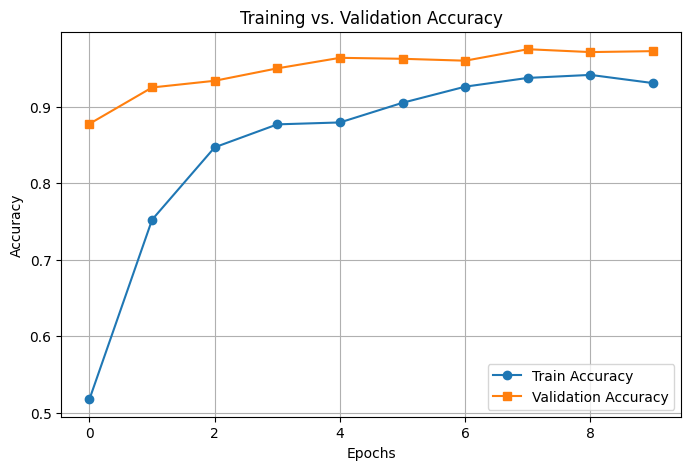

In [11]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9818 - loss: 0.0787
Test accuracy: 0.9625
